In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [22]:
det = pd.read_csv("data/det/202404190000_det.csv", index_col=0)
sol = pd.read_csv("data/sol/202404190000_sol.csv", index_col=0)
eig = pd.read_csv("data/eig/202404190000_eig.csv", index_col=0)

In [39]:
def plot_df(solver_time_df, title):
    index = solver_time_df.index.values+ 100.0
    mean = solver_time_df.mean(axis=1).values
    std = solver_time_df.std(axis=1).values
    index = np.array(index, dtype=float)
    mean = np.array(mean, dtype=float)
    std = np.array(std, dtype=float)

    deg = [1,2,3,4,5,6,7,8,9,10]

    coefficients = np.polyfit(index, mean, 2) 
    # p = np.poly1d(coefficients)
    # # 次数の数だけグラフを準備(2行5列のサブプロット)
    # fig, axes = plt.subplots(2, 5, figsize=(30,10))

    data = index
    target = mean
    data = data.reshape(-1,1)
    target = target.reshape(-1,1)
    score_list = []
    predict_list = []
    for d in deg:
        # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
        # 多項式変換した後、線形回帰モデルでパラメータを学習
        regr = Pipeline([
                        ('poly', PolynomialFeatures(degree=d)),
                        ('linear', LinearRegression())
                        ])

        # モデルの学習
        regr.fit(data, target)

        # 学習モデルによる予測結果の算出
        p_poly = regr.predict(data)
        predict_list.append(p_poly)

        poly_features = regr.named_steps['poly'].get_feature_names_out(input_features=['x'])
        coefs = regr.named_steps['linear'].coef_
        equation = "y = "
        coefs = coefs.flatten()
        score_list.append(regr.score(data, target))


        # for i, coef in enumerate(coefs):
        #     if i == 0:
        #         equation += f"{coef:.7f}"
        #     else:
        #         equation += f" + {coef:.7f} * {poly_features[i]}"
        # print(equation)

        # # グラフ作成(次数の数だけグラフ化)
        # if d < 6:
        #     i, j = 0, d-1
        # else:
        #     i, j = 1, d-6
        # axes[i][j].plot(data, target)
        # axes[i][j].fill_between(index, mean + std, mean - std, alpha=0.4)
        # axes[i][j].plot(data, p_poly, color='r') # 決定係数の算出
        # axes[i][j].set_title('deg ='+ str(d) + ' R^2={:.7f}'.format(regr.score(data, target)))
        # #axes[i][j].set_title(title)
        # axes[i][j].set_ylabel("time[s]")
        # axes[i][j].set_xlabel("degree N")

    max_v = max(score_list)
    print(max_v)
    max_index = score_list.index(max_v)
    print(max_index)

    plt.plot(data, target)
    plt.fill_between(index, mean + std, mean - std, alpha=0.4)
    plt.plot(data, predict_list[max_index], color = "r")


0.9145192410272106
4


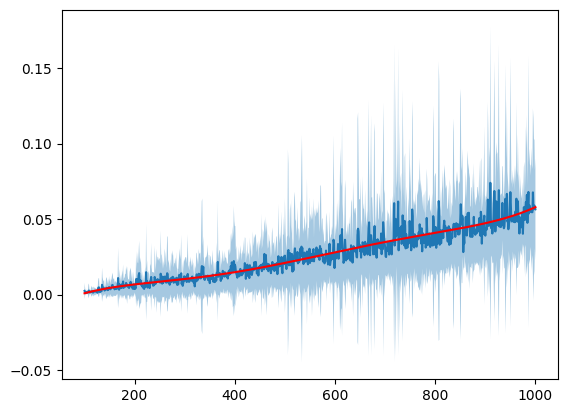

In [40]:
plot_df(det, "det")

0.9119093263276998
7


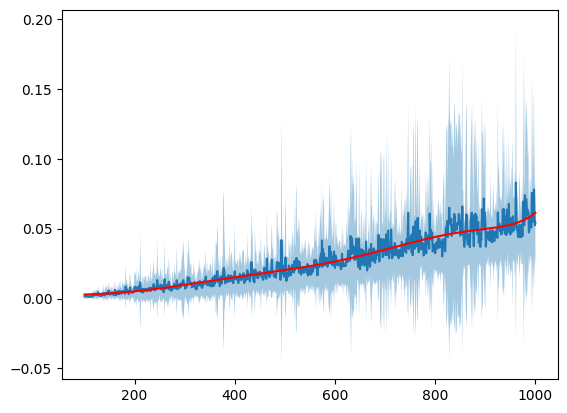

In [41]:
plot_df(sol, "sol")


0.99916792393244
5


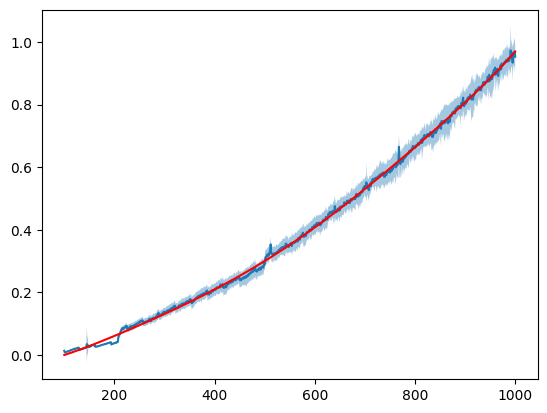

In [42]:
plot_df(eig, "eig")
